In [1]:
import xpress as xp
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
# Create a problem called location

location = xp.problem(name='location')

In [119]:
conda install -c anaconda openpyxl

Solving environment: done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


# load the data

In [3]:
# current charging points

charg_point_path = os.path.join('Project_data/Charging_points.xlsx')
charg_point = pd.read_excel(charg_point_path)

In [6]:
charg_point.head()

,CP ID,Type,geometry,Latitude,Longitude,grid number
0,51085,Slow,POINT (-3.011192785069142 56.47296514001275),56.472965,-3.011193,146
1,SCO50884,Fast,POINT (-3.057191218106697 56.46983341001484),56.469833,-3.057191,76
2,50264,Slow,POINT (-2.917475282989725 56.48982926001875),56.489829,-2.917475,304
3,50263,Slow,POINT (-2.91751565698979 56.48972199001865),56.489722,-2.917516,304
4,50274,Fast,POINT (-2.966478267037299 56.46149715999641),56.461497,-2.966478,214


In [7]:
# expected demand for the next four years

demand_path = os.path.join('Project_data/Demand_data.xlsx')
demand = pd.read_excel(demand_path)

In [8]:
demand.loc[100:105]

,Ref,geometry,Number of Charging Points,Number of Slow Charging Points,Number of Fast Charging Points,Number of Rapid Charging Points,Number of PoI,Number of Potential Locations,Distance from Centre,NEIGHBORS,Demand_0,Demand_1,Demand_2,Demand_3
100,101,"POLYGON ((-3.044190289672857 56.4533005586958,...",0,0,0,0,0,1,4442.921761,"[86, 87, 88, 100, 102, 114, 115, 116]",0.0,0.000000,72.230017,241.821149
101,102,POLYGON ((-3.044324704148503 56.45819844677619...,0,0,0,0,0,3,4375.167312,"[87, 88, 89, 101, 103, 115, 116, 117]",0.0,444.631572,968.172278,1627.425046
102,103,POLYGON ((-3.044459160842206 56.46309633075683...,0,0,0,0,1,11,4374.844088,"[88, 89, 90, 102, 104, 116, 117, 118]",0.0,443.063371,1007.432635,1783.221659
103,104,POLYGON ((-3.044593659772223 56.46799421063793...,0,0,0,0,1,3,4441.966808,"[89, 90, 91, 103, 105, 117, 118, 119]",0.0,444.257814,1387.704616,2920.679769
104,105,POLYGON ((-3.044728200956817 56.47289208641969...,0,0,0,0,0,2,4573.566879,"[90, 91, 92, 104, 106, 118, 119, 120]",0.0,0.000000,488.563483,1595.447338
105,106,"POLYGON ((-3.044862784414267 56.4777899581023,...",0,0,0,0,0,1,4764.304294,"[91, 92, 93, 105, 107, 119, 120, 121]",0.0,0.000000,873.458540,2708.092266


In [9]:
# points of interest in each grid

interest_point_path = os.path.join('Project_data/Interest _points.xlsx')
interest_point = pd.read_excel(interest_point_path)

In [10]:
interest_point.head()

,amenity,geometry,Latitude,Longitude,grid number
0,restaurant,POINT (-2.852617986940523 56.48412800000578),56.484128,-2.852618,400
1,restaurant,POINT (-2.849993386942502 56.47134889999293),56.471349,-2.849993,398
2,restaurant,POINT (-2.872495786961546 56.46693379999114),56.466934,-2.872496,369
3,restaurant,POINT (-2.873346686962511 56.46599179999032),56.465992,-2.873347,369
4,restaurant,POINT (-2.873426086962618 56.46584759999016),56.465848,-2.873426,369


In [11]:
amenity1 = set(interest_point['amenity'])
amenity1

# more cars at which place?
# for example, many restaurants at 369

{'restaurant', 'school', 'supermarket'}

In [12]:
# potential charging points

pt_charg_point_path = os.path.join('Project_data/Potential_charging_points.xlsx')
pt_charg_point = pd.read_excel(pt_charg_point_path)

In [13]:
pt_charg_point.head()

,amenity,geometry,Latitude,Longitude,grid number
0,parking,POINT (-3.046891287099621 56.46621650001012),56.466217,-3.046891,89
1,fuel,POINT (-2.848473686941031 56.47224079999363),56.472241,-2.848474,412
2,parking,POINT (-2.895034186977277 56.47320819999986),56.473208,-2.895034,328
3,fuel,POINT (-2.963304387034162 56.46350399999802),56.463504,-2.963304,228
4,fuel,POINT (-2.9776499870463 56.46097389999711),56.460974,-2.977650,200


In [14]:
# Defining the index set

number_of_grids = 434
number_of_years = 4
grids = range(number_of_grids)
years = range(number_of_years)

In [15]:
# the demand every slow/ fast/ rapid chargers can satisfy
slow_c = [2000, 3500]
fast_c = [4000, 5200]
rapid_c = [30000, 50500]

# decision variables

In [16]:
# how many slow/ fast/ rapid connectors to have in each potential grid in year t
x1 = np.array([xp.var(vartype = xp.integer, name='x1_{0}_{1}'.format(t,i+1))
                    for t in years for i in grids]).reshape(number_of_years, number_of_grids)
x2 = np.array([xp.var(vartype = xp.integer, name='x2_{0}_{1}'.format(t,i+1))
                    for t in years for i in grids]).reshape(number_of_years, number_of_grids)
x3 = np.array([xp.var(vartype = xp.integer, name='x3_{0}_{1}'.format(t,i+1))
                    for t in years for i in grids]).reshape(number_of_years, number_of_grids)
location.addVariable(x1, x2, x3)

In [17]:
# for each grid, demand can be satisfied by this grid and its neighbours
y = np.array([xp.var( name='y_{0}_{1}'.format(t,i+1))
                    for t in years for i in grids], dtype=xp.npvar).reshape(number_of_years, number_of_grids)

# constraints

In [18]:
# for each potential charging point, we can install one or more charging stations
grid_pt_charg = pt_charg_point.groupby('grid number').count()
grid_pt_charg

,amenity,geometry,Latitude,Longitude
grid number,,,,
61,2,2,2,2
75,3,3,3,3
76,4,4,4,4
77,1,1,1,1
88,3,3,3,3
...,...,...,...,...
385,1,1,1,1
397,1,1,1,1
399,2,2,2,2


In [19]:
num_grid_pt = number_of_grids*[0]
for ind in grid_pt_charg.index:
    # print(ind)
    # print(grid_pt_charg.iloc[ind]['grid number'])
    num_grid_pt[ind-1] = grid_pt_charg.loc[ind]['amenity']
num_grid_pt[75-1]

3

# constraint 1

In [20]:
# demand can be satisfied by itself and its neighbour grids

In [21]:
sat_demand = number_of_grids*[0]
for ind in charg_point.index:
    # for one current charging point, 2 chargers
    # already satisfied demand
    if charg_point.iloc[ind]['Type'] == 'Slow':
        sat_demand[charg_point.iloc[ind]['grid number']-1] += 2* slow_c[1]
    elif charg_point.iloc[ind]['Type'] == 'Fast':
        sat_demand[charg_point.iloc[ind]['grid number']-1] += 2* fast_c[1]
    elif charg_point.iloc[ind]['Type'] == 'Rapid':
        sat_demand[charg_point.iloc[ind]['grid number']-1] += 2* rapid_c[1]

In [22]:
for i in grids:
    y[0,i] = xp.Sum((slow_c[1]*x1[t1,i] + fast_c[1]*x2[t1,i] + rapid_c[1]*x3[t1,i] + sat_demand[i]) for t1 in range(1))
    y[1,i] = xp.Sum((slow_c[1]*x1[t1,i] + fast_c[1]*x2[t1,i] + rapid_c[1]*x3[t1,i] + sat_demand[i]) for t1 in range(2))
    y[2,i] = xp.Sum((slow_c[1]*x1[t1,i] + fast_c[1]*x2[t1,i] + rapid_c[1]*x3[t1,i] + sat_demand[i]) for t1 in range(3))
    y[3,i] = xp.Sum((slow_c[1]*x1[t1,i] + fast_c[1]*x2[t1,i] + rapid_c[1]*x3[t1,i] + sat_demand[i]) for t1 in range(4))



for ind in demand.index:
    #print(demand.loc[ind]['Ref'],demand.loc[ind]['NEIGHBORS'])
    i = demand.loc[ind]['Ref']-1
    neighbour_list = demand.loc[ind]['NEIGHBORS'].strip('[').strip(']').replace(' ','')
    neighbour_list = neighbour_list.split(',')
    for x in neighbour_list:
        
        x = int(x)-1
        y[0,i] += xp.Sum((slow_c[1]*x1[t1,x] + fast_c[1]*x2[t1,x] + rapid_c[1]*x3[t1,x] + sat_demand[x]) for t1 in range(1))
        y[1,i] += xp.Sum((slow_c[1]*x1[t1,x] + fast_c[1]*x2[t1,x] + rapid_c[1]*x3[t1,x] + sat_demand[x]) for t1 in range(2))
        y[2,i] += xp.Sum((slow_c[1]*x1[t1,x] + fast_c[1]*x2[t1,x] + rapid_c[1]*x3[t1,x] + sat_demand[x]) for t1 in range(3))
        y[3,i] += xp.Sum((slow_c[1]*x1[t1,x] + fast_c[1]*x2[t1,x] + rapid_c[1]*x3[t1,x] + sat_demand[x]) for t1 in range(4))

In [23]:
# satisfying demand of the 4 years
# demand can also be satisfied by neighbour girds
location.addConstraint(y[0,i]>= 0.8*demand.loc[demand['Ref'] == i+1, 'Demand_0'].iloc[0] for i in grids)
location.addConstraint(y[1,i]>= 0.8*demand.loc[demand['Ref'] == i+1, 'Demand_1'].iloc[0] for i in grids)
location.addConstraint(y[2,i]>= 0.8*demand.loc[demand['Ref'] == i+1, 'Demand_2'].iloc[0] for i in grids)
location.addConstraint(y[3,i]>= 0.8*demand.loc[demand['Ref'] == i+1, 'Demand_3'].iloc[0] for i in grids)

# constraint 2

In [24]:
# upper bound of new chargers each year for each grid
for i in grids:
    nearby_demand_0 = demand.loc[demand['Ref']== i+1]['Demand_0']
    nearby_demand_1 = demand.loc[demand['Ref']== i+1]['Demand_1']
    nearby_demand_2 = demand.loc[demand['Ref']== i+1]['Demand_2']
    nearby_demand_3 = demand.loc[demand['Ref']== i+1]['Demand_3']
    neighbour_list = demand.loc[i]['NEIGHBORS'].strip('[').strip(']').replace(' ','')
    neighbour_list = neighbour_list.split(',')
    for x in neighbour_list:
        x = int(x)-1
        nearby_demand_0 += demand.loc[x]['Demand_0']
        nearby_demand_1 += demand.loc[x]['Demand_1']
        nearby_demand_2 += demand.loc[x]['Demand_2']
        nearby_demand_3 += demand.loc[x]['Demand_3']
    
    grid_max_0 = (0.8*nearby_demand_0/slow_c[0] - 2*demand.loc[demand['Ref']== i+1]['Number of Charging Points'])[i]
    grid_max_1 = (0.8*nearby_demand_1/slow_c[0] - 2*demand.loc[demand['Ref']== i+1]['Number of Charging Points'])[i]
    grid_max_2 = (0.8*nearby_demand_2/slow_c[0] - 2*demand.loc[demand['Ref']== i+1]['Number of Charging Points'])[i]
    grid_max_3 = (0.8*nearby_demand_3/slow_c[0] - 2*demand.loc[demand['Ref']== i+1]['Number of Charging Points'])[i]
    if grid_max_0 < 0:
        grid_max_0 = 0
    if grid_max_1 < 0:
        grid_max_1 = 0
    if grid_max_2 < 0:
        grid_max_2 = 0
    if grid_max_3 < 0:
        grid_max_3 = 0
    location.addConstraint(x1[t,i] + x2[t,i] + x3[t,i] <= grid_max_0 for t in range(1))
    location.addConstraint(x1[t,i] + x2[t,i] + x3[t,i] <= grid_max_1 for t in range(1,2))
    location.addConstraint(x1[t,i] + x2[t,i] + x3[t,i] <= grid_max_2 for t in range(2,3))
    location.addConstraint(x1[t,i] + x2[t,i] + x3[t,i] <= grid_max_3 for t in range(3,4))

# constraint 3

In [25]:
# grids in city center

center_grid = [184,185,186,187,188,198,199,200,201,202,212,213,214,215,216,226,227,228,229,230,240,241,242,243,244]

In [26]:
# stricter limit on the number of new chargers for grids in city center

for i in center_grid:
    i = i-1
    nearby_demand_0 = demand.loc[demand['Ref']== i+1]['Demand_0']
    nearby_demand_1 = demand.loc[demand['Ref']== i+1]['Demand_1']
    nearby_demand_2 = demand.loc[demand['Ref']== i+1]['Demand_2']
    nearby_demand_3 = demand.loc[demand['Ref']== i+1]['Demand_3']
    neighbour_list = demand.loc[i]['NEIGHBORS'].strip('[').strip(']').replace(' ','')
    neighbour_list = neighbour_list.split(',')
    for x in neighbour_list:
        x = int(x)-1
        nearby_demand_0 += demand.loc[x]['Demand_0']
        nearby_demand_1 += demand.loc[x]['Demand_1']
        nearby_demand_2 += demand.loc[x]['Demand_2']
        nearby_demand_3 += demand.loc[x]['Demand_3']
    
    grid_max_0 = (0.6*nearby_demand_0/slow_c[0] - 2*demand.loc[demand['Ref']== i+1]['Number of Charging Points'])[i]
    grid_max_1 = (0.6*nearby_demand_1/slow_c[0] - 2*demand.loc[demand['Ref']== i+1]['Number of Charging Points'])[i]
    grid_max_2 = (0.6*nearby_demand_2/slow_c[0] - 2*demand.loc[demand['Ref']== i+1]['Number of Charging Points'])[i]
    grid_max_3 = (0.6*nearby_demand_3/slow_c[0] - 2*demand.loc[demand['Ref']== i+1]['Number of Charging Points'])[i]
    if grid_max_0 < 0:
        grid_max_0 = 0
    if grid_max_1 < 0:
        grid_max_1 = 0
    if grid_max_2 < 0:
        grid_max_2 = 0
    if grid_max_3 < 0:
        grid_max_3 = 0
    location.addConstraint(x1[t,i] + x2[t,i] + x3[t,i] <= grid_max_0 for t in range(1))
    location.addConstraint(x1[t,i] + x2[t,i] + x3[t,i] <= grid_max_1 for t in range(1,2))
    location.addConstraint(x1[t,i] + x2[t,i] + x3[t,i] <= grid_max_2 for t in range(2,3))
    location.addConstraint(x1[t,i] + x2[t,i] + x3[t,i] <= grid_max_3 for t in range(3,4))

# constraint 4

In [27]:
# we want to see a variety of types of chargers
# some vehicles cannot use rapid chargers

location.addConstraint(xp.Sum(x3[t,i] for t in years for i in grids) >= 
                       0.2*xp.Sum(x1[t,i]+x2[t,i]+x3[t,i] for t in years for i in grids))
location.addConstraint(xp.Sum(x1[t,i] for t in years for i in grids) >= 
                       0.2*xp.Sum(x1[t,i]+x2[t,i]+x3[t,i] for t in years for i in grids))
location.addConstraint(xp.Sum(x2[t,i] for t in years for i in grids) >= 
                       0.2*xp.Sum(x1[t,i]+x2[t,i]+x3[t,i] for t in years for i in grids))
location.addConstraint(xp.Sum(x3[t,i] for t in years for i in grids) <= 
                       0.4*xp.Sum(x1[t,i]+x2[t,i]+x3[t,i] for t in years for i in grids))

# constraint 5

In [28]:
# if no potential locations in this grid, then no new chargers

for ind in demand.index:
    if demand.loc[ind]['Number of Potential Locations'] == 0:
        location.addConstraint(x1[t,ind] == 0 for t in years)
        location.addConstraint(x2[t,ind] == 0 for t in years)
        location.addConstraint(x3[t,ind] == 0 for t in years)

# constraint 6

In [29]:
# nonnegative constraint

location.addConstraint(x1[t,i] >= 0 for t in years for i in grids)
location.addConstraint(x2[t,i] >= 0 for t in years for i in grids)
location.addConstraint(x3[t,i] >= 0 for t in years for i in grids)

# Objective function

In [30]:
# list for all grids, grids with current charging points, value = 1

charg_pt_exist = number_of_grids*[0]
for ind in demand.index:
    if demand.loc[ind]['Number of Charging Points'] > 0:
        charg_pt_exist[ind] = 1

In [31]:
location.setObjective(xp.Sum(charg_pt_exist[i]* xp.Sum(x1[t,i]+x2[t,i]+x3[t,i] for t in years) 
                             for i in grids),
                     sense = xp.maximize)

In [32]:
location.solve()

FICO Xpress v8.13.7, Hyper, solve started 14:16:18, Nov 28, 2022
Heap usage: 8140KB (peak 8140KB, 2722KB system)
Maximizing MILP location using up to 8 threads, with these control settings:
OUTPUTLOG = 1
Original problem has:
     12816 rows         5208 cols       144780 elements      5208 globals
Presolved problem has:
       281 rows          810 cols         4164 elements       810 globals
LP relaxation tightened
Presolve finished in 0 seconds
Heap usage: 6867KB (peak 17MB, 2722KB system)

Coefficient range                    original                 solved        
  Coefficients   [min,max] : [ 2.00e-01,  5.05e+04] / [ 2.00e-01,  1.93e+00]
  RHS and bounds [min,max] : [ 1.29e-03,  3.09e+06] / [ 1.00e+00,  1.05e+02]
  Objective      [min,max] : [ 1.00e+00,  1.00e+00] / [ 1.00e+00,  1.00e+00]
Autoscaling applied standard scaling

Symmetric problem: generators: 146, support set: 726
 Number of orbits: 166, largest orbit: 66
 Row orbits: 42, row support: 188
Will try to keep branch an

In [33]:
print(f'The objective function value is {location.getObjVal()}') 

The objective function value is 1601.0


# some prints about the new chargers bulit every year

In [34]:
print('Sum of slow chargers in the four years:', location.getSolution(xp.Sum(x1[t,i] for t in years for i in grids)))
print('Sum of fast chargers in the four years:', location.getSolution(xp.Sum(x2[t,i] for t in years for i in grids)))
print('Sum of rapid chargers in the four years:', location.getSolution(xp.Sum(x3[t,i] for t in years for i in grids)))
sum_of_charg = location.getSolution(xp.Sum(x1[t,i]+x2[t,i]+x3[t,i] for t in years for i in grids))
print('Percentage of slow chargers: ',location.getSolution(xp.Sum(x1[t,i] for t in years for i in grids))/sum_of_charg)
print('Percentage of fast chargers: ',location.getSolution(xp.Sum(x2[t,i] for t in years for i in grids))/sum_of_charg)
print('Percentage of rapid chargers: ',location.getSolution(xp.Sum(x3[t,i] for t in years for i in grids))/sum_of_charg)

Sum of slow chargers in the four years: 503.0
Sum of fast chargers in the four years: 629.0
Sum of rapid chargers in the four years: 539.0
Percentage of slow chargers:  0.30101735487731895
Percentage of fast chargers:  0.37642130460801915
Percentage of rapid chargers:  0.3225613405146619


In [35]:
print('Sum of slow chargers in the first year: ', location.getSolution(xp.Sum(x1[0,i] for i in grids)))
print('Sum of fast chargers in the first year: ', location.getSolution(xp.Sum(x2[0,i] for i in grids)))
print('Sum of rapid chargers in the first year: ', location.getSolution(xp.Sum(x3[0,i] for i in grids)))
first_sum_of_charg = location.getSolution(xp.Sum(x1[0,i]+x2[0,i]+x3[0,i] for i in grids))
print('Percentage of slow chargers: ',location.getSolution(xp.Sum(x1[0,i] for i in grids))/first_sum_of_charg)
print('Percentage of fast chargers: ',location.getSolution(xp.Sum(x2[0,i] for i in grids))/first_sum_of_charg)
print('Percentage of rapid chargers: ',location.getSolution(xp.Sum(x3[0,i] for i in grids))/first_sum_of_charg)

Sum of slow chargers in the first year:  33.0
Sum of fast chargers in the first year:  193.0
Sum of rapid chargers in the first year:  27.0
Percentage of slow chargers:  0.13043478260869565
Percentage of fast chargers:  0.7628458498023716
Percentage of rapid chargers:  0.1067193675889328


In [36]:
print('Sum of slow chargers in the second year: ', location.getSolution(xp.Sum(x1[1,i] for i in grids)))
print('Sum of fast chargers in the second year: ', location.getSolution(xp.Sum(x2[1,i] for i in grids)))
print('Sum of rapid chargers in the second year: ', location.getSolution(xp.Sum(x3[1,i] for i in grids)))
sec_sum_of_charg = location.getSolution(xp.Sum(x1[1,i]+x2[1,i]+x3[1,i] for i in grids))
print('Percentage of slow chargers: ',location.getSolution(xp.Sum(x1[1,i] for i in grids))/sec_sum_of_charg)
print('Percentage of fast chargers: ',location.getSolution(xp.Sum(x2[1,i] for i in grids))/sec_sum_of_charg)
print('Percentage of rapid chargers: ',location.getSolution(xp.Sum(x3[1,i] for i in grids))/sec_sum_of_charg)

Sum of slow chargers in the second year:  10.0
Sum of fast chargers in the second year:  132.0
Sum of rapid chargers in the second year:  159.0
Percentage of slow chargers:  0.03322259136212625
Percentage of fast chargers:  0.43853820598006643
Percentage of rapid chargers:  0.5282392026578073


In [37]:
print('Sum of slow chargers in the third year: ', location.getSolution(xp.Sum(x1[2,i] for i in grids)))
print('Sum of fast chargers in the third year: ', location.getSolution(xp.Sum(x2[2,i] for i in grids)))
print('Sum of rapid chargers in the third year: ', location.getSolution(xp.Sum(x3[2,i] for i in grids)))
third_sum_of_charg = location.getSolution(xp.Sum(x1[2,i]+x2[2,i]+x3[2,i] for i in grids))
print('Percentage of slow chargers: ',location.getSolution(xp.Sum(x1[2,i] for i in grids))/third_sum_of_charg)
print('Percentage of fast chargers: ',location.getSolution(xp.Sum(x2[2,i] for i in grids))/third_sum_of_charg)
print('Percentage of rapid chargers: ',location.getSolution(xp.Sum(x3[2,i] for i in grids))/third_sum_of_charg)

Sum of slow chargers in the third year:  301.0
Sum of fast chargers in the third year:  0.0
Sum of rapid chargers in the third year:  143.0
Percentage of slow chargers:  0.6779279279279279
Percentage of fast chargers:  0.0
Percentage of rapid chargers:  0.32207207207207206


In [38]:
print('Sum of slow chargers in the fourth year: ', location.getSolution(xp.Sum(x1[3,i] for i in grids)))
print('Sum of fast chargers in the fourth year: ', location.getSolution(xp.Sum(x2[3,i] for i in grids)))
print('Sum of rapid chargers in the fourth year: ', location.getSolution(xp.Sum(x3[3,i] for i in grids)))
four_sum_of_charg = location.getSolution(xp.Sum(x1[3,i]+x2[3,i]+x3[3,i] for i in grids))
print('Percentage of slow chargers: ',location.getSolution(xp.Sum(x1[3,i] for i in grids))/four_sum_of_charg)
print('Percentage of fast chargers: ',location.getSolution(xp.Sum(x2[3,i] for i in grids))/four_sum_of_charg)
print('Percentage of rapid chargers: ',location.getSolution(xp.Sum(x3[3,i] for i in grids))/four_sum_of_charg)

Sum of slow chargers in the fourth year:  159.0
Sum of fast chargers in the fourth year:  304.0
Sum of rapid chargers in the fourth year:  210.0
Percentage of slow chargers:  0.2362555720653789
Percentage of fast chargers:  0.45170876671619614
Percentage of rapid chargers:  0.31203566121842496


In [39]:
print('Number of new chargers in the first year: ',first_sum_of_charg)
print('Number of new chargers in the second year: ',sec_sum_of_charg)
print('Number of new chargers in the third year: ',third_sum_of_charg)
print('Number of new chargers in the fourth year: ',four_sum_of_charg)

Number of new chargers in the first year:  253.0
Number of new chargers in the second year:  301.0
Number of new chargers in the third year:  444.0
Number of new chargers in the fourth year:  673.0


In [40]:
print('The growth rate of the number of new chargers of the second year: ',
      (sec_sum_of_charg-first_sum_of_charg)/first_sum_of_charg)
print('The growth rate of the number of new chargers of the third year: ',
      (third_sum_of_charg-sec_sum_of_charg)/sec_sum_of_charg)
print('The growth rate of the number of new chargers of the fourth year: ',
      (four_sum_of_charg-third_sum_of_charg)/third_sum_of_charg)

The growth rate of the number of new chargers of the second year:  0.18972332015810275
The growth rate of the number of new chargers of the third year:  0.4750830564784053
The growth rate of the number of new chargers of the fourth year:  0.5157657657657657


In [41]:
center_grid = [184,185,186,187,188,198,199,200,201,202,212,213,214,215,216,226,227,228,229,230,240,241,242,243,244]

In [42]:
first_city_center_sum = location.getSolution(xp.Sum(x1[0,i-1]+x2[0,i-1]+x3[0,i-1] for i in center_grid))
sec_city_center_sum = location.getSolution(xp.Sum(x1[1,i-1]+x2[1,i-1]+x3[1,i-1] for i in center_grid))
third_city_center_sum = location.getSolution(xp.Sum(x1[2,i-1]+x2[2,i-1]+x3[2,i-1] for i in center_grid))
four_city_center_sum = location.getSolution(xp.Sum(x1[3,i-1]+x2[3,i-1]+x3[3,i-1] for i in center_grid))

In [43]:
print('Percentage of new chargers in city center in first year: ', (first_city_center_sum/first_sum_of_charg))
print('Percentage of new chargers in city center in second year: ', (sec_city_center_sum/sec_sum_of_charg))
print('Percentage of new chargers in city center in third year: ', (third_city_center_sum/third_sum_of_charg))
print('Percentage of new chargers in city center in fourth year: ', (four_city_center_sum/four_sum_of_charg))

Percentage of new chargers in city center in first year:  0.3438735177865613
Percentage of new chargers in city center in second year:  0.5083056478405316
Percentage of new chargers in city center in third year:  0.5585585585585585
Percentage of new chargers in city center in fourth year:  0.5854383358098069


In [44]:
slow_c_current = 2*sum(demand['Number of Slow Charging Points'])
fast_c_current = 2*sum(demand['Number of Fast Charging Points'])
rapid_c_current = 2*sum(demand['Number of Rapid Charging Points'])

In [45]:
print(slow_c_current)
print(location.getSolution(xp.Sum(x1[0,i] for i in grids)))

72
33.0


In [46]:
a = location.getSolution(xp.Sum(x1[0,i] for i in grids))

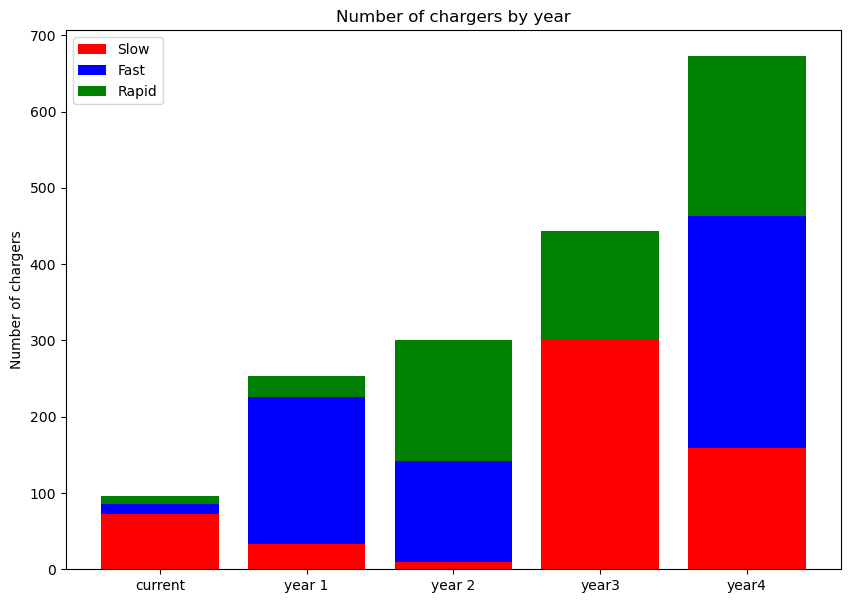

In [47]:
N = 5
ind = np.arange(N)
width = 0.35
slow_chargers = np.array([slow_c_current,location.getSolution(xp.Sum(x1[0,i] for i in grids)),
                 location.getSolution(xp.Sum(x1[1,i] for i in grids)),location.getSolution(xp.Sum(x1[2,i] for i in grids)), 
                 location.getSolution(xp.Sum(x1[3,i] for i in grids))])
fast_chargers = np.array([fast_c_current,location.getSolution(xp.Sum(x2[0,i] for i in grids)),
                 location.getSolution(xp.Sum(x2[1,i] for i in grids)),location.getSolution(xp.Sum(x2[2,i] for i in grids)), 
                 location.getSolution(xp.Sum(x2[3,i] for i in grids))])
rapid_chargers = np.array([rapid_c_current,location.getSolution(xp.Sum(x3[0,i] for i in grids)),
                 location.getSolution(xp.Sum(x3[1,i] for i in grids)),location.getSolution(xp.Sum(x3[2,i] for i in grids)), 
                  location.getSolution(xp.Sum(x3[3,i] for i in grids))])
fig = plt.subplots(figsize =(10,7))
p1 = plt.bar(ind, slow_chargers, color='r')
p2 = plt.bar(ind, fast_chargers,bottom=slow_chargers, color='b')
p3 = plt.bar(ind, rapid_chargers,bottom=slow_chargers+fast_chargers, color='g')
plt.ylabel('Number of chargers')
plt.title('Number of chargers by year')
plt.xticks(ind, ('current', 'year 1', 'year 2', 'year3', 'year4'))
plt.legend((p1[0],p2[0],p3[0]),('Slow', 'Fast', 'Rapid'))

plt.show()

In [48]:
# red grids are grids with new chargers

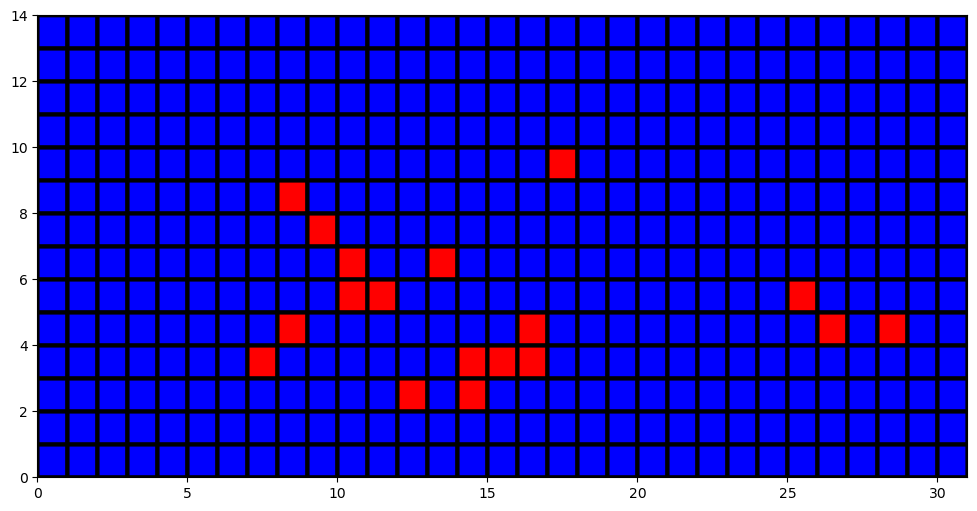

In [49]:
map_T = np.zeros((31, 14))
for i in grids:
    if location.getSolution(xp.Sum(x1[t,i]+x2[t,i]+x3[t,i] for t in years)):
        x = i//14
        y = i %14
        map_T[x , y] = 1


from matplotlib import colors

cmap = colors.ListedColormap(['Blue','red'])
plt.figure(figsize=(12,6))
plt.pcolor(map_T.T,cmap=cmap,edgecolors='k', linewidths=3)
plt.show()